# Travail à rendre n°2 – Vision par Ordinateur
## Classification d’images CIFAR-10 avec KNN
### Validation croisée 5-Fold

**Objectif :**  
Implémenter un classifieur *K-Nearest Neighbors (KNN)* pour la classification d’images du dataset **CIFAR-10**,  
en utilisant une **validation croisée 5-fold**, et analyser l’impact du nombre de voisins *k* sur la performance.


## 1. Importation des bibliothèques

Nous utilisons les bibliothèques suivantes :
- **TensorFlow / Keras** : chargement du dataset CIFAR-10  
- **Scikit-learn** : implémentation du KNN et validation croisée  
- **Matplotlib** : visualisation des résultats

In [1]:
!pip install -q scikit-learn tensorflow matplotlib

## 2. Chargement du dataset CIFAR-10

Le dataset CIFAR-10 contient **60 000 images couleur** de taille **32×32**, réparties en **10 classes**.
Nous utilisons uniquement un sous-ensemble du dataset afin de réduire le temps de calcul.

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape X_train :", X_train.shape)
print("Shape y_train :", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape X_train : (50000, 32, 32, 3)
Shape y_train : (50000, 1)


## 3. Prétraitement des données


Les étapes de prétraitement sont :
1. Réduction du nombre d’images
2. Aplatissement des images (32×32×3 → 3072)
3. Normalisation des données

Ces étapes sont nécessaires car le KNN travaille sur des vecteurs de caractéristiques.

In [3]:
import numpy as np

# Réduction du dataset
X_train = X_train[:10000]
y_train = y_train[:10000].ravel()

# Aplatir les images
X_train = X_train.reshape(X_train.shape[0], -1)

print("Nouvelle shape :", X_train.shape)

Nouvelle shape : (10000, 3072)


## 4. KNN avec validation croisée 5-Fold

Nous utilisons un **Pipeline** combinant :
- Standardisation des données
- Classifieur KNN

La validation croisée 5-fold permet d’obtenir une estimation plus fiable des performances.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
mean_accuracies = []

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )

    mean_accuracies.append(scores.mean())
    print(f"k = {k} | Accuracy moyenne = {scores.mean():.4f}")

k = 1 | Accuracy moyenne = 0.2805
k = 3 | Accuracy moyenne = 0.2714
k = 5 | Accuracy moyenne = 0.2887
k = 7 | Accuracy moyenne = 0.2931
k = 9 | Accuracy moyenne = 0.2905
k = 11 | Accuracy moyenne = 0.2885
k = 13 | Accuracy moyenne = 0.2868
k = 15 | Accuracy moyenne = 0.2833


## 5. Résultats expérimentaux

La figure ci-dessous montre l’évolution de l’accuracy moyenne en fonction du nombre de voisins *k*.

On observe :
- Une faible performance pour des valeurs très petites de *k* (sur-apprentissage)
- Une dégradation pour des valeurs trop grandes de *k* (sous-apprentissage)
- Un compromis optimal pour une valeur intermédiaire de *k*

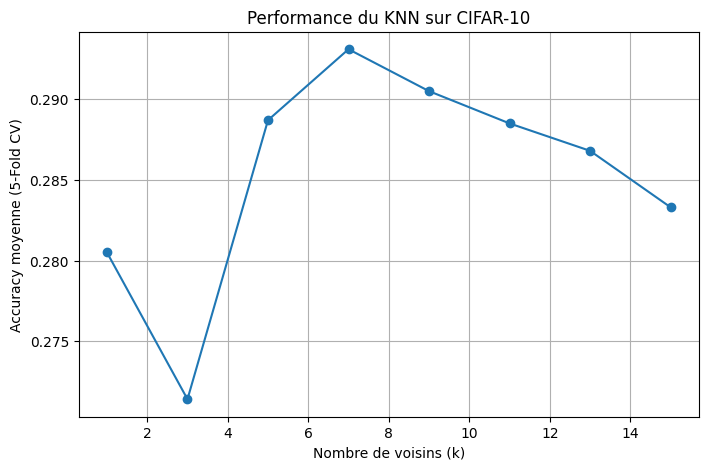

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy moyenne (5-Fold CV)")
plt.title("Performance du KNN sur CIFAR-10")
plt.grid(True)
plt.show()

## 6. Conclusion

Dans ce travail, nous avons implémenté un classifieur KNN pour la classification d’images CIFAR-10.
Les résultats montrent que le choix du paramètre *k* a un impact significatif sur les performances.
La validation croisée 5-fold a permis d’obtenir une évaluation robuste du modèle.